# **DATOS** **DE** **RASPBERRY**
(Presion, Temperatura, y Humedad)


## Codigo para toma de datos en Raspberry:



```
from datetime import datetime
    import numpy as np
    import os
    import time
    from sense_hat import SenseHat
    sense=SenseHat()
   while 1:
        namefile=datetime.now().strftime("%Y-%m-%d") + ".csv"
        if not os.path.exists("carpeta_donde_guardarlo"+ namefile):
            f=open("carpeta_donde_se_guardo" + namefile, "w")
            f.write("Datetime,Humedad,Temperatura,Presion\r\n")
            f.close()
        else:
            d=open("carpeta_donde_se_guardo" + namefile, "a")
            d.write(datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
            humidity=sense.get_humidity()
            temp=sense.get.humidity()
            pressure=sense.get_pressure()
            d.write(",{:.2f},{:.2f},{:.2f}\r\n".format(humidity,temp,pressure))
            d.close()
            print("OK")
            message="T:" + str(temp) + "P:" str(pressure)+ "H:"+str(humidity)
            sense.show_message(message,scroll_speed=0.10)
            time.sleep(1800)
```



## Codigo para presentacion de los datos en graficas

**I.Importacion de las bibliotecas que utilizaremos.**

In [ ]:
import pandas as pd #Instalacion(importacion) de libreria para la manipulacion y analisis de datos.
import numpy as np #Instalacion(importacion) de biblioteca para calculos numericos, facilita el trabajo con arrays (vectores y matrices), analisis y estructurar un gran volumen de datos,
import glob #Instalacion(importacion) de modulo nos sirve para buscar en una ruta para todos los nombres de los archivos.
import matplotlib.pyplot as plt #Instalacion(importacion) de libreria para la realizacion de graficas como histogramas.
import os #Instalacion(importacion) de modulo nos ayuda acceder a funcionalidades dependientes del sistema operativo.
from datetime import datetime #Instalacion(importacion) nos permite manipular fechas y horas

**II**. **Lee** **y** **carga** **los** **archivos** ".**csv**"

In [ ]:
listafile=glob.glob("2023*.csv") #Buscar archivos con 2023, en la terminacion ".csv"

In [ ]:
listafile #Aqui es donde se mandan los archivos csv.

['2023-10-24.csv',
 '2023-10-16.csv',
 '2023-10-20.csv',
 '2023-10-14.csv',
 '2023-10-27.csv',
 '2023-10-18.csv',
 '2023-10-13.csv',
 '2023-10-26.csv',
 '2023-10-30.csv',
 '2023-10-05 (1).csv',
 '2023-10-19.csv',
 '2023-10-28.csv',
 '2023-10-12.csv',
 '2023-10-10 (1).csv',
 '2023-10-17.csv',
 '2023-10-09 (1).csv',
 '2023-10-08 (1).csv',
 '2023-10-29.csv',
 '2023-10-07 (1).csv',
 '2023-10-21.csv',
 '2023-10-25.csv',
 '2023-10-11.csv',
 '2023-10-15.csv']

**III**. **Combinacion** **de los datos, aqui** **el** **glob** **nos** **ayudara** **a** **obtener** **una** **lista** **de** **archivos** ".**CSV**" **que** **comienzan** **con** **2023**, **despues** **se** **cargaran** **cada** **uno** **de** **los** **archivos** **en** **el** **Dataframe** **de** **pandas**, **para** **asi** **concatenarlos** **en** **un** **solo** **llamado** **datafull.**

In [ ]:
data=[] #Creacion de una lista vacia
for files in listafile: # Se creo un ciclo for que nos ayude a modificar los archivos en listafile
  data.append (pd.read_csv(files)) #Leer los Dataframes y agregarlos a la lista data
datafull=pd.concat(data,ignore_index=True) # Se recopilan los datos y se concatenan en una sola lista(datafull).

**IV. Manipularemos la columna de tiempo (fecha y hora), se convirtio la columna "Datatime" en el formato fecha y hora, ordenando asi el DataFrame por tiempo**

In [ ]:
time=pd.to_datetime(datafull["Datetime"][:],format="%Y-%m-%d %H:%M:%S") #La columna datetime se les asigna elementos de fecha y hora, y se sustituye por una columna llamada time

In [ ]:
datafull=datafull.drop(["Datetime"], axis=1) #Eliminacion de la fila "Datetime" para asignar time

In [ ]:
datafull.insert(0,"Tiempo", time, True) #Las 3 lineas de cogido transforman la columna de fechas en un formato de pandas  para que se les asigne la variable tiempo, la cual se inserta a primcipio de dateframe para facilitar el manejo de la informacion termporal.

**V.Ordenamiento de los datos**

In [ ]:
dataffl=datafull.sort_values(by=["Tiempo"], ignore_index=True) #Ordenar nuestro datafll dentro de la etapa de procesamiento

**VI.Remplazaremos los valores de presion que son 0 con NaN.**

In [ ]:
dataffl["Presion"].replace(0, np.nan, inplace=True) #Se remplazan los valores de 0 dentro de la variable presion por NaN para que de ea no detecte valores y pueda sustituirlos

In [ ]:
np.isnan(dataffl["Presion"]) #Prueba si el elemento es NAN o no.

0       False
1       False
2       False
3       False
4       False
        ...  
1014    False
1015    False
1016    False
1017    False
1018    False
Name: Presion, Length: 1019, dtype: bool

**VII. Se cuentan los valores faltantes**

In [ ]:
j=0 #Inicia una variable J en 0, esto nos ayuda cuantos valores en NaN hay.
for i in dataffl["Presion"]: #Se utiliza for para iterar sobre la columna "Presion" del dataffl.
    if np.isnan(i): #Comprobacion si el valor es NaN.
        j +=1
print(j) #Imprime el valor en J.

14


**VIII.Interpolaremos los datos faltantes**

In [ ]:
dataffl["Presion"].interpolate(method='polynomial',order=2,inplace=True) #Interpolacion para atribuir valores faltantes en la serie de datos en "Presion", en el metodo polinomial del segundo orden

**IX.Creacion de un grafico con los datos de la temperatura, la humedad, y la presion en funcion del tiempo.**

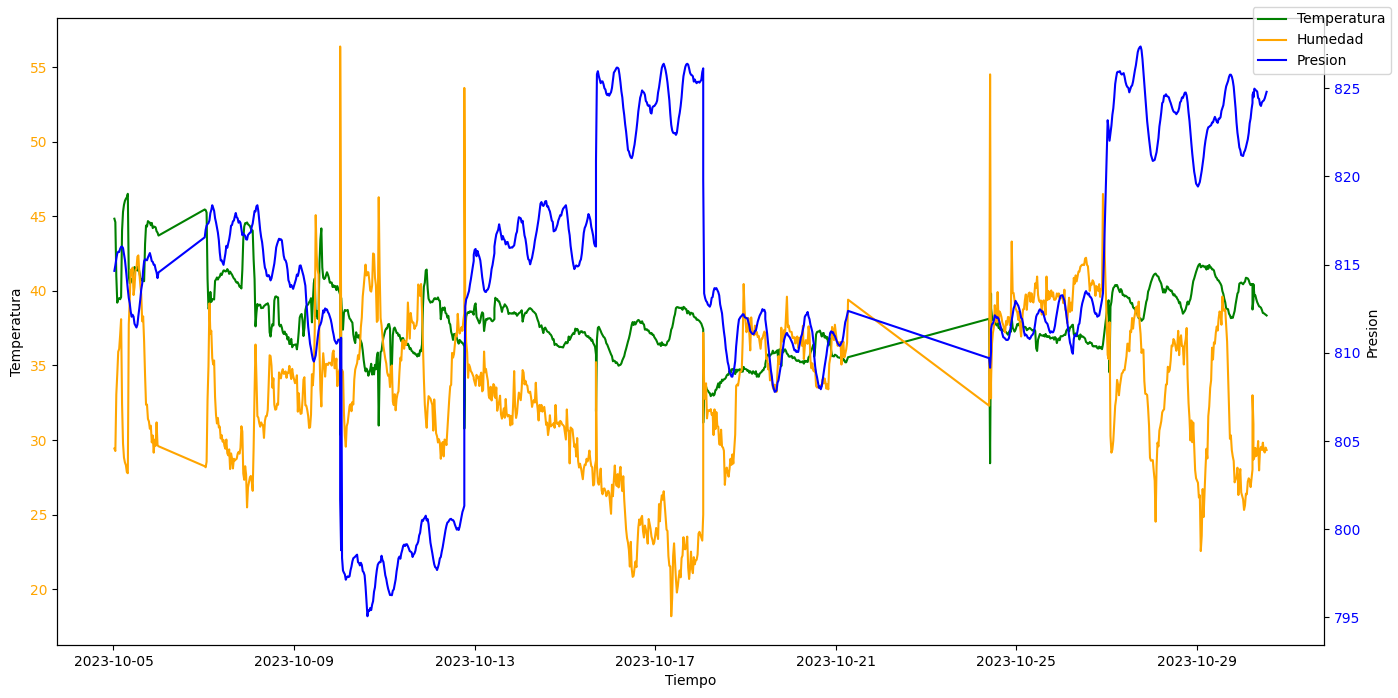

In [ ]:
fig,ax1 = plt.subplots(figsize=(14,7)) #Esta linea ayuda a crear una figura con dos ejes (ax1 y ax2) con sus respectivos ejes xy
ax1.set_xlabel("Tiempo") #Se le asigna una variable a x de ax1
ax1.set_ylabel("Temperatura") #Se le asigna una variable al eje y de ax1
ax1.plot(dataffl["Tiempo"], dataffl[" Temperatura"], label="Temperatura", color="g") #Se realiza la grafica tomando a la variable tiempo como base
ax1.tick_params (axis="y", labelcolor="orange") #Se establecen los parametros y el color de la grafica
ax1.plot(dataffl["Tiempo"],dataffl["Humedad"], label="Humedad", color="orange") #Realiza la grafica de humedad con respecto al eje del Tiempo
ax2=ax1.twinx() #Copia las propiedades de ax1 a ax2, estableciendo el mismo eje x para ambas "Tiempo"
ax2.set_ylabel("Presion") #Establece el lado y de ax2 como presion
ax2.plot(dataffl["Tiempo"], dataffl["Presion"],label="Presion", color="blue") #Realiza la grafica de presion respecto al eje del Tiempo
ax2.tick_params (axis="y", labelcolor="blue") #Establece los parametros y el color de ax2
fig.legend(loc=1) #Crea una leyenda en la esquina superior derecha
fig.tight_layout() #Evita que los elementos se encimen

**X.Creacion de los histogramas**

Text(0.5, 0, 'PRESION')

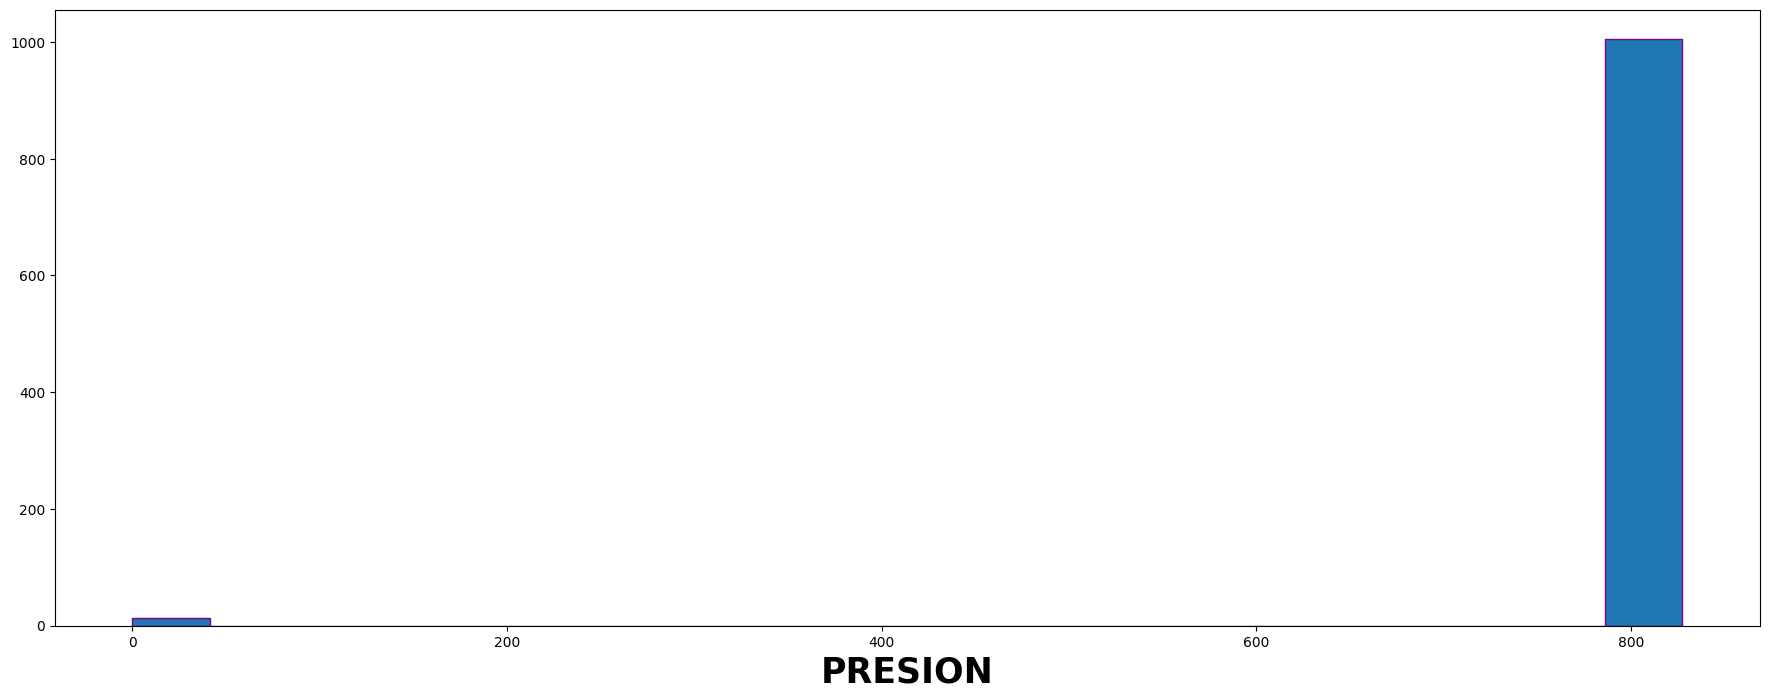

In [ ]:
plt.figure(figsize=(22,8)) #La creacion de grafica, y figsize nos a definir las dimensiones del grafico.
plt.hist(datafull["Presion"], bins=20, edgecolor="purple") #Crea un histograma de la variable indicada y establece sus parametros.
plt.xlabel("PRESION", fontsize=25, fontweight="bold",color= "black" ) #Asigna un titulo a la figura y establece sus parametros


La linea de codigo utilizada anteriormente se ejecuta sobre todas las variables, adaptandola a la que se quiere graficar

Text(0.5, 0, 'TEMPERATURA(°C)')

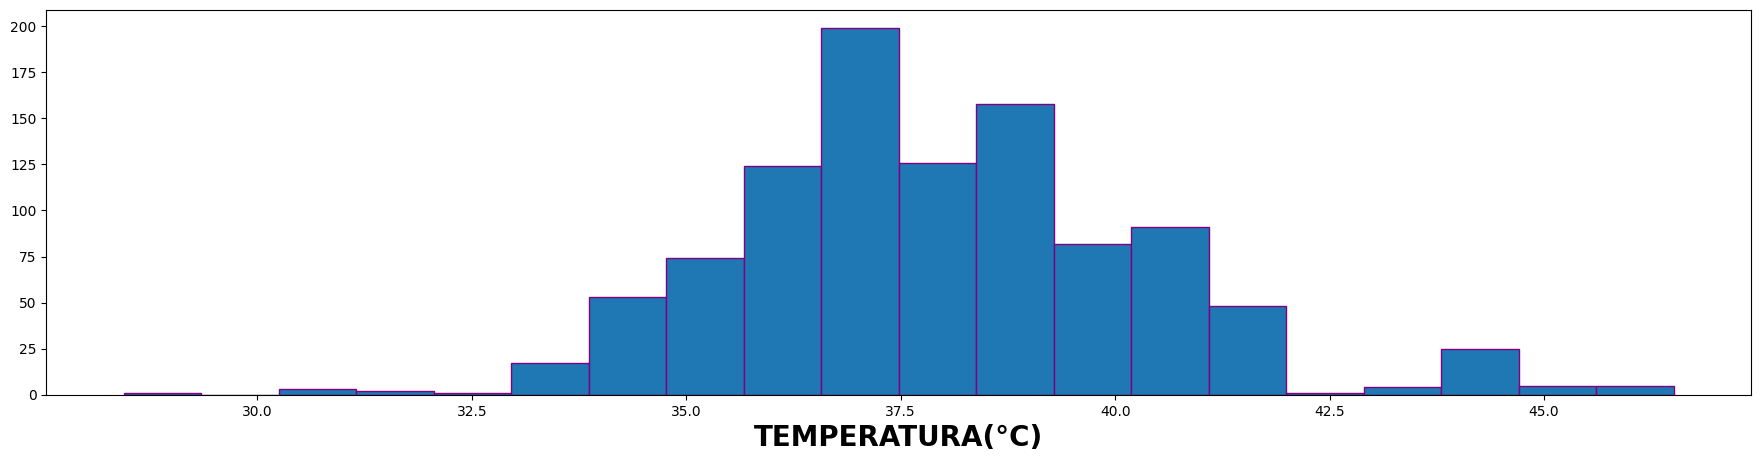

In [ ]:
plt.figure(figsize=(22,5))
plt.hist(dataffl[" Temperatura"], bins=20, edgecolor="purple")
plt.xlabel("TEMPERATURA(°C)", fontsize=20, fontweight="bold", color= 'black')

Text(0.5, 0, 'HUMEDAD')

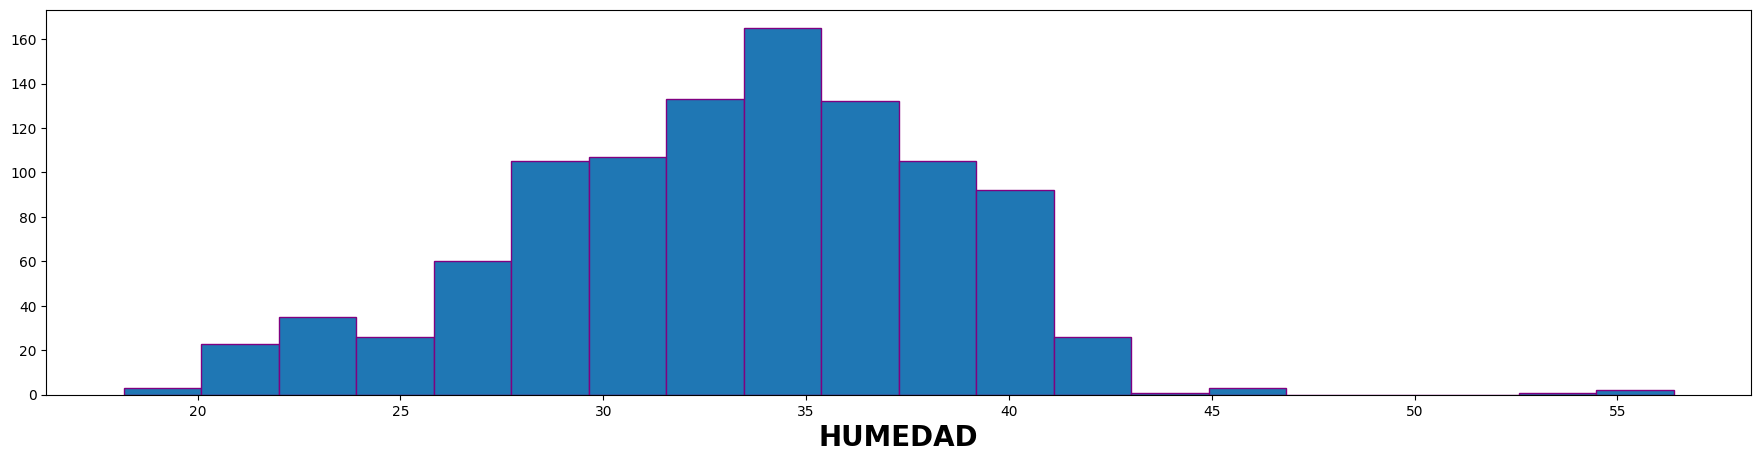

In [ ]:
plt.figure(figsize=(22,5))
plt.hist(dataffl["Humedad"], bins=20, edgecolor="purple")
plt.xlabel("HUMEDAD", fontsize=20, fontweight="bold", color= 'black')